# Actividad 4
- Galván Álvarez Diego
- García Alanis Juan Genaro

In [1]:
library(readxl)
df_CETES <- read_excel("Datos/CETES.xlsx",sheet = 'Hoja2')

### Grafico de los datos

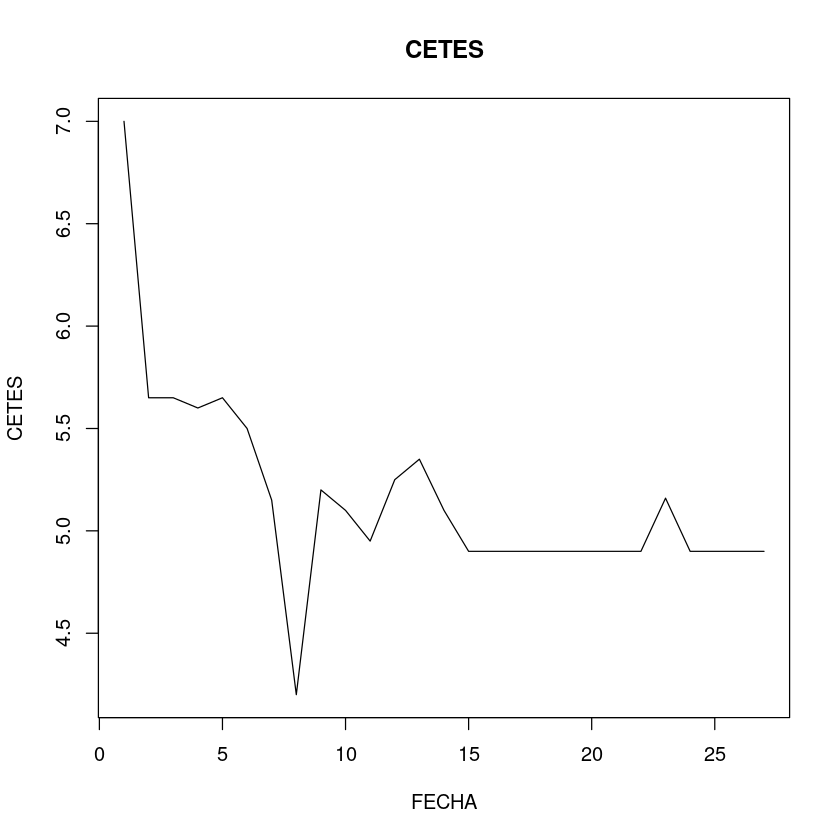

In [32]:
plot(df_CETES,main='CETES',type='l')

In [3]:
sapply(df_CETES, sd, na.rm=TRUE)
sapply(df_CETES, var, na.rm=TRUE)

FECHA    CETES 
7.937254 0.490098

FECHA     CETES 
63.000000  0.240196

In [4]:
summary(df_CETES)

     FECHA          CETES     
 Min.   : 1.0   Min.   :4.20  
 1st Qu.: 7.5   1st Qu.:4.90  
 Median :14.0   Median :4.95  
 Mean   :14.0   Mean   :5.16  
 3rd Qu.:20.5   3rd Qu.:5.30  
 Max.   :27.0   Max.   :7.00  

Observando los datos parecen poder ser encerrados en una caja horizontal de su varianza, cumpliendo el supuesto de media y varianza constantes

### ACF y PACF


Autocorrelations of series ‘df_CETES$CETES’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.384  0.280  0.231  0.166  0.059 -0.017 -0.187  0.093  0.049  0.002 
    11     12     13     14     15     16     17     18     19     20     21 
 0.050  0.021 -0.073 -0.130 -0.164 -0.121 -0.115 -0.111 -0.112 -0.149 -0.150 
    22     23     24     25     26 
-0.079 -0.136 -0.117 -0.097 -0.077 

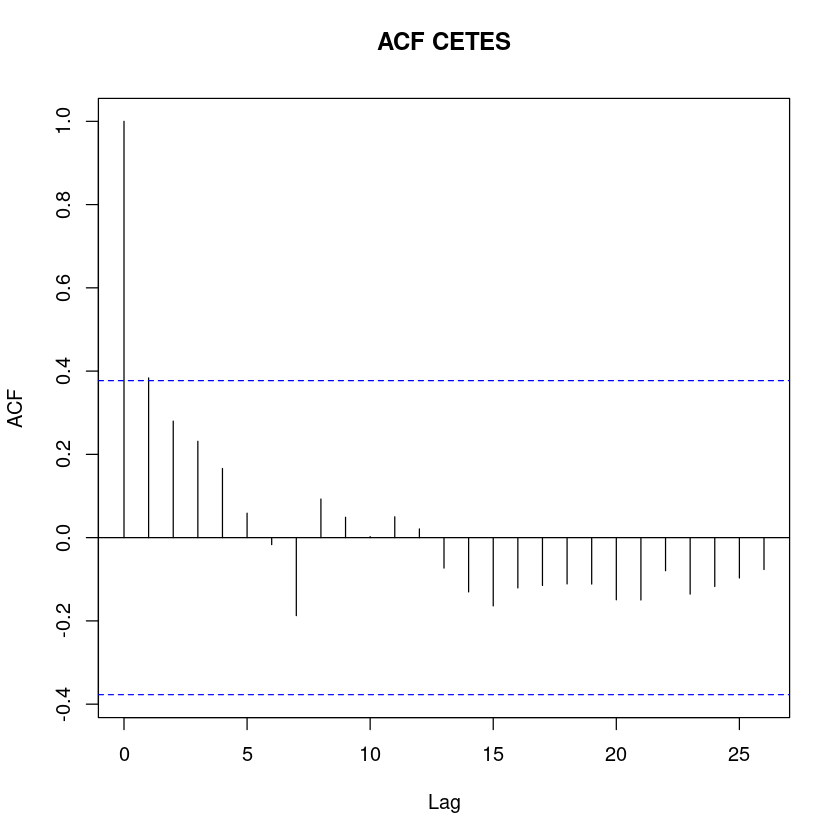

In [31]:
acf(df_CETES$CETES,plot='true',lag.max=30,main='ACF CETES')
acf(df_CETES$CETES,plot='false',lag.max=30)


Partial autocorrelations of series ‘df_CETES$CETES’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.384  0.156  0.097  0.027 -0.067 -0.080 -0.219  0.282  0.047 -0.018  0.035 
    12     13     14     15     16     17     18     19     20     21     22 
-0.085 -0.152 -0.167  0.055  0.025  0.001  0.039 -0.101 -0.213 -0.132  0.116 
    23     24     25     26 
-0.001  0.035  0.043 -0.088 

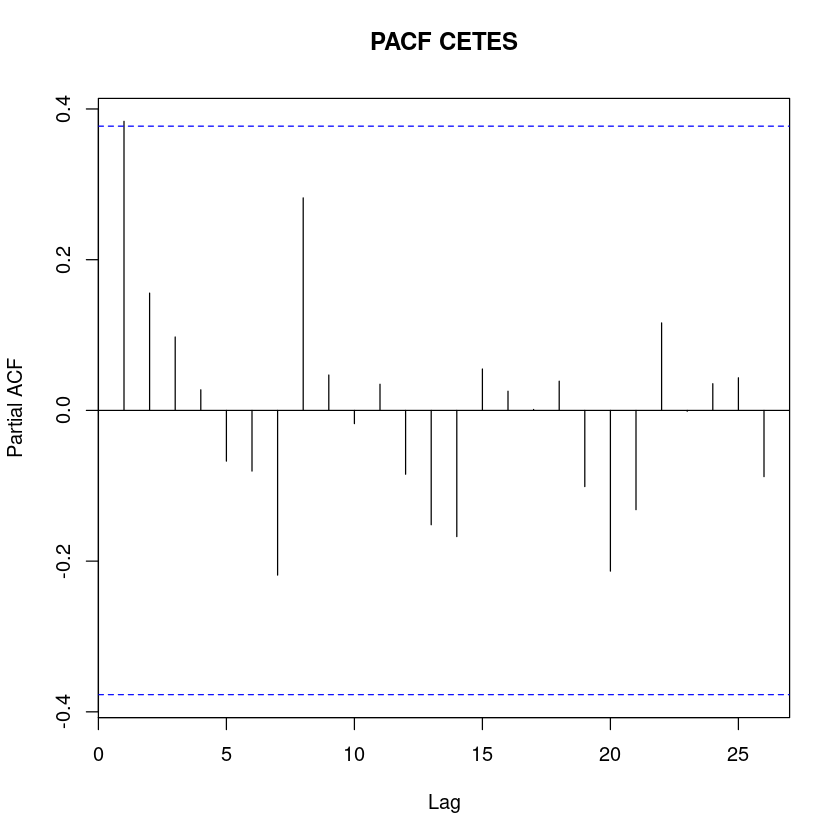

In [30]:
pacf(df_CETES$CETES,plot='true',lag.max=30,main='PACF CETES')
pacf(df_CETES$CETES,plot='false',lag.max=30)

Los datos si se muestran estacionarios pues acf decrece rápidamente, además solo hay un valor significativo, siendo otro indicio de que la serie de tiempo es estacionaria

### Periodograma y Periodograma Integrado

,omega,frecuencia,periodos,densidad
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.2327106,1,27.000000,1.148197e-01
3,0.4654211,2,13.500000,8.230016e-02
4,0.6981317,3,9.000000,5.987341e-02
5,0.9308423,4,6.750000,1.578958e-03
6,1.1635528,5,5.400000,2.918921e-02
7,1.3962634,6,4.500000,4.628307e-02
8,1.6289740,7,3.857143,3.495821e-02
9,1.8616845,8,3.375000,8.357573e-05
10,2.0943951,9,3.000000,2.676329e-02


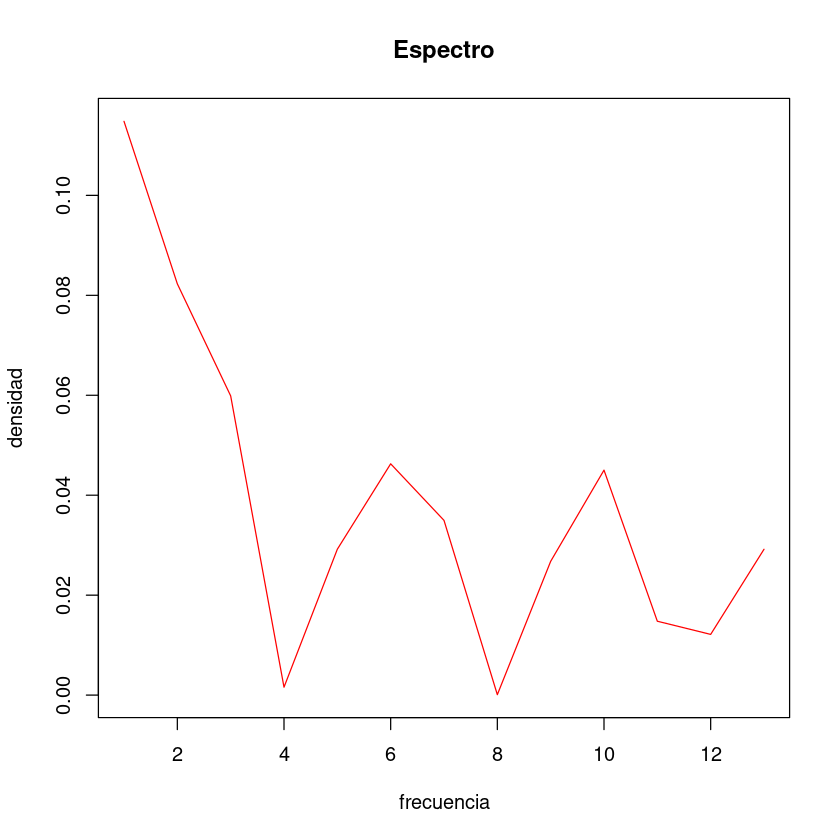

In [7]:
library("descomponer")
gperiodograma(df_CETES$CETES)
df_period<-periodograma(df_CETES$CETES)
head(df_period,n=41)

Se observa que los datos tienen siguen un periodo de 4, es decir los valores van a parecerse cada 4 observaciones.

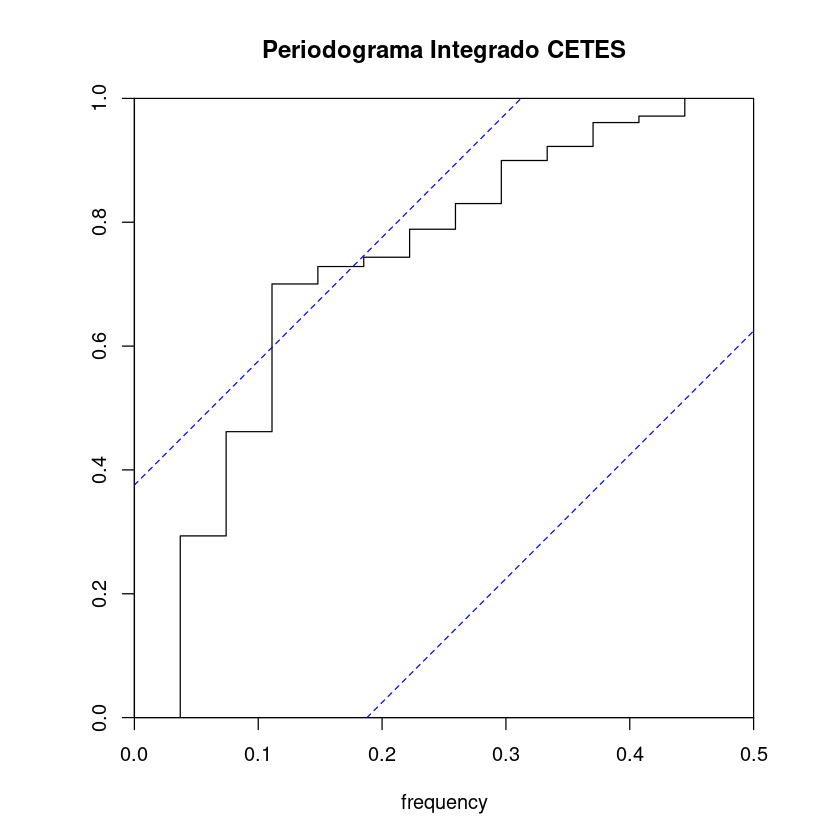

In [29]:
cpgram(df_CETES$CETES,main='Periodograma Integrado CETES')

Observano esta grafica se aprecia que la mayoria los dato quedan dentro del intervalo de confianza pero hay un pico que se sale habiendo correlacion en los datos.

¿Cuál es el tratamiento que debe darse al dato faltante de la serie?
- Para mantener las observaciones equidistantes y mantener la distribución de los datos similar, se obtuvo el promedio del resto de observaciones y se utilizó como dato para acompletar la serie.

### Ruido Blanco

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.4767432 -0.4195740  0.0004538  0.0905603  0.6276901  2.8496694 

[1] 0.8797408

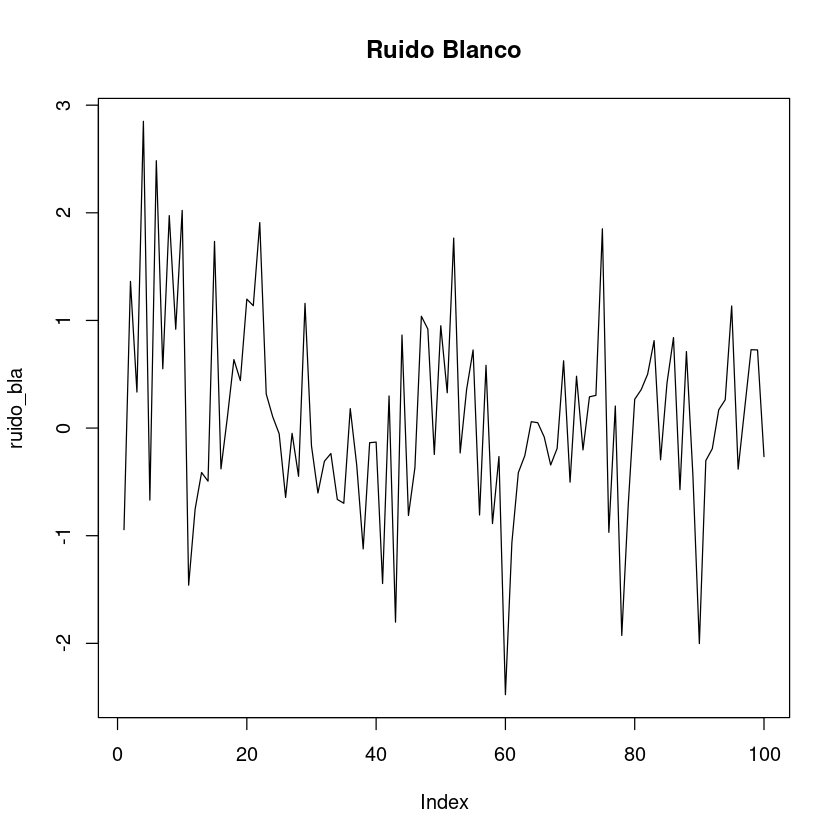

In [9]:
ruido_bla <- rnorm(100, 0, 1)
plot(ruido_bla,type='l',main='Ruido Blanco')
summary(ruido_bla)
var(ruido_bla)

Como se muestra en la gráfica, el ruido blanco se puede encerrar en una caja horizontal formada por su varianza ya que su media y varianza son constantes

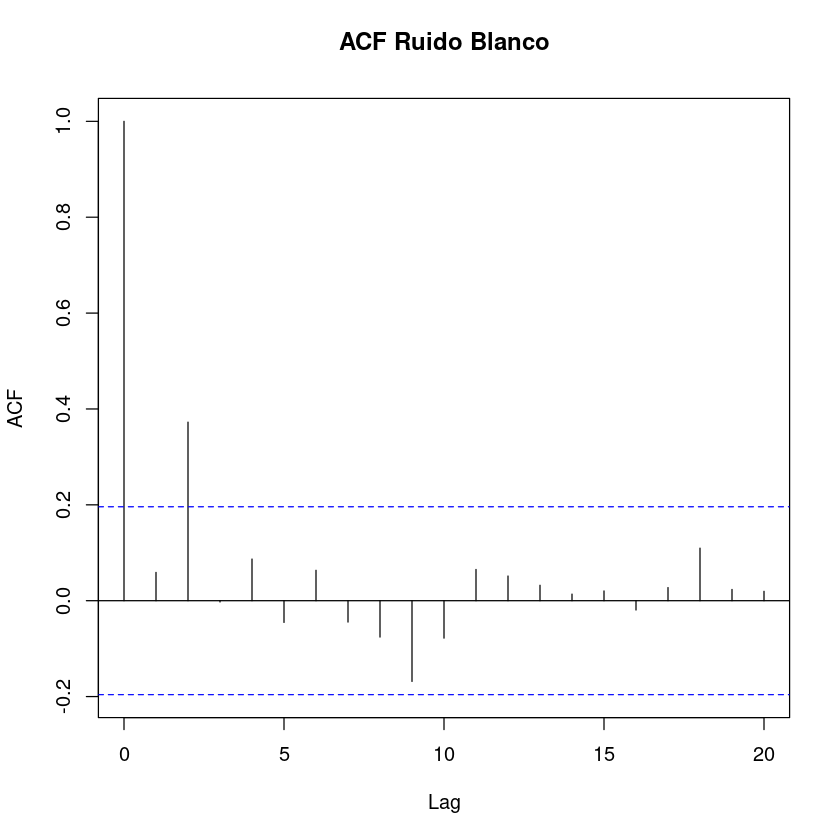

In [28]:
acf(ruido_bla,plot='true',main='ACF Ruido Blanco')

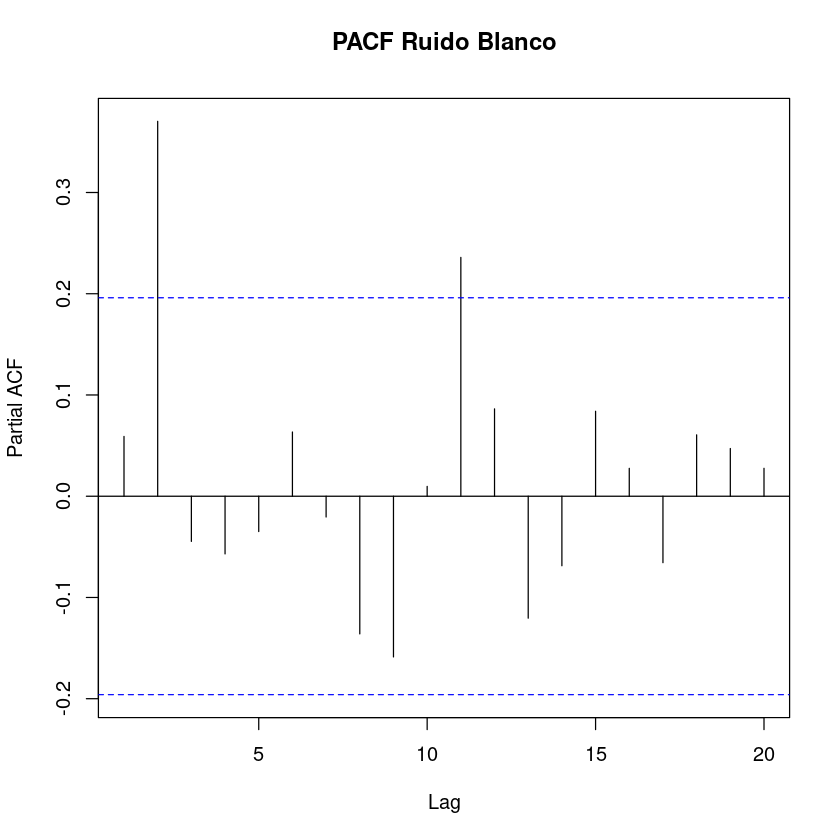

In [27]:
pacf(ruido_bla,plot='true',main='PACF Ruido Blanco')

Se observa que el ruido blanco es estacionarios pues se trunca, sin embargo no hay valores significativos despues del 0 en la acf. Por otro lado en la PACF se observa un valor significativo en 17

,omega,frecuencia,periodos,densidad
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.06283185,1,100.00000,0.4382904
3,0.12566371,2,50.00000,0.2134060
4,0.18849556,3,33.33333,0.1335955
5,0.25132741,4,25.00000,0.4554073
6,0.31415927,5,20.00000,0.1513408
7,0.37699112,6,16.66667,0.3685897


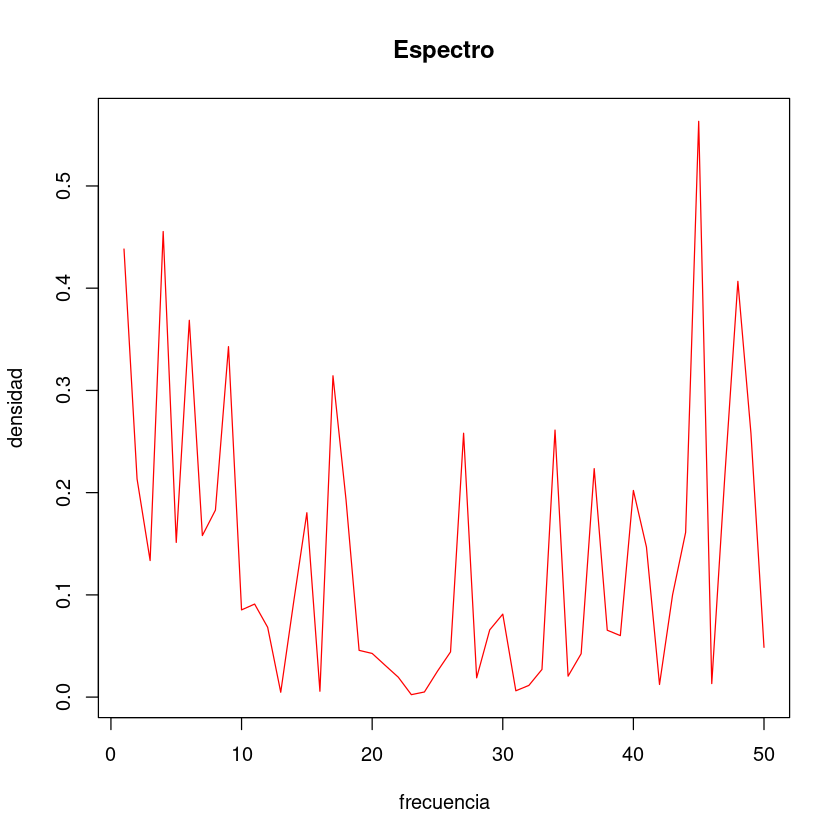

In [12]:
gperiodograma(ruido_bla)
df_period_r<-periodograma(ruido_bla)
head(df_period_r)

Tras analizar el periodograma en se observan varias frecuencias significativas.

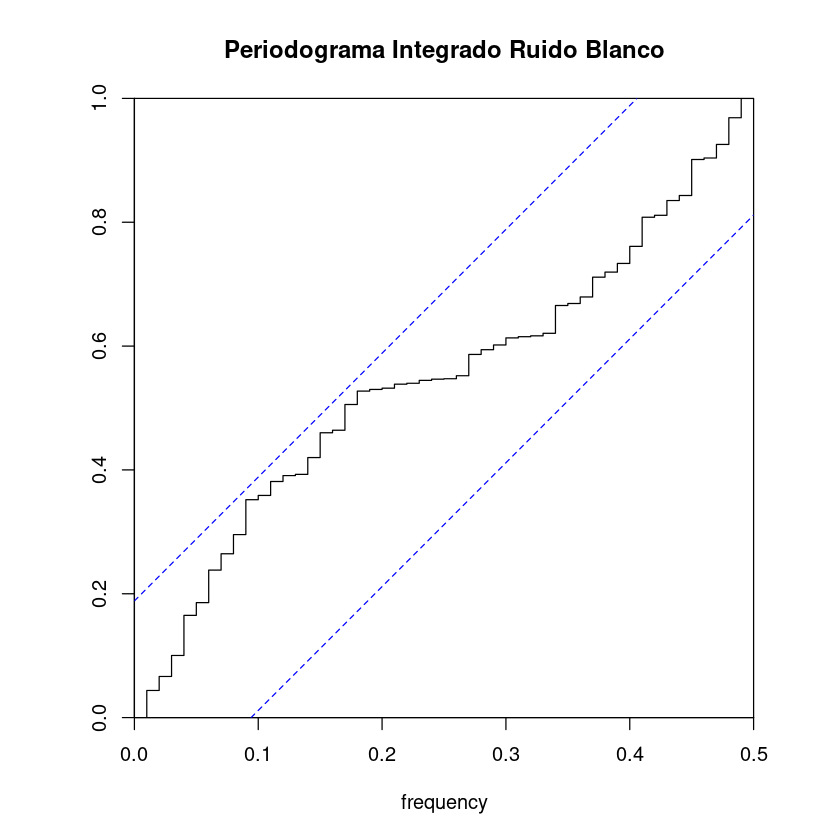

In [26]:
cpgram(ruido_bla,main='Periodograma Integrado Ruido Blanco')

Como era de esperarce el ruido blanco cae dentro de el intervalo de confianza, mostrando que no hay correlacion en los datos.

## Analisis Espectral Proyecto

In [14]:
library(readxl)
Prestamos_CID <- read_excel("Pronostico_CID/Datos/Prestamos_Devoluciones_CID.xlsx",sheet = "Prestamos2019")
Devoluciones_CID <- read_excel("Pronostico_CID/Datos/Prestamos_Devoluciones_CID.xlsx",sheet = "Devoluciones2019")

### Graficación de los datos

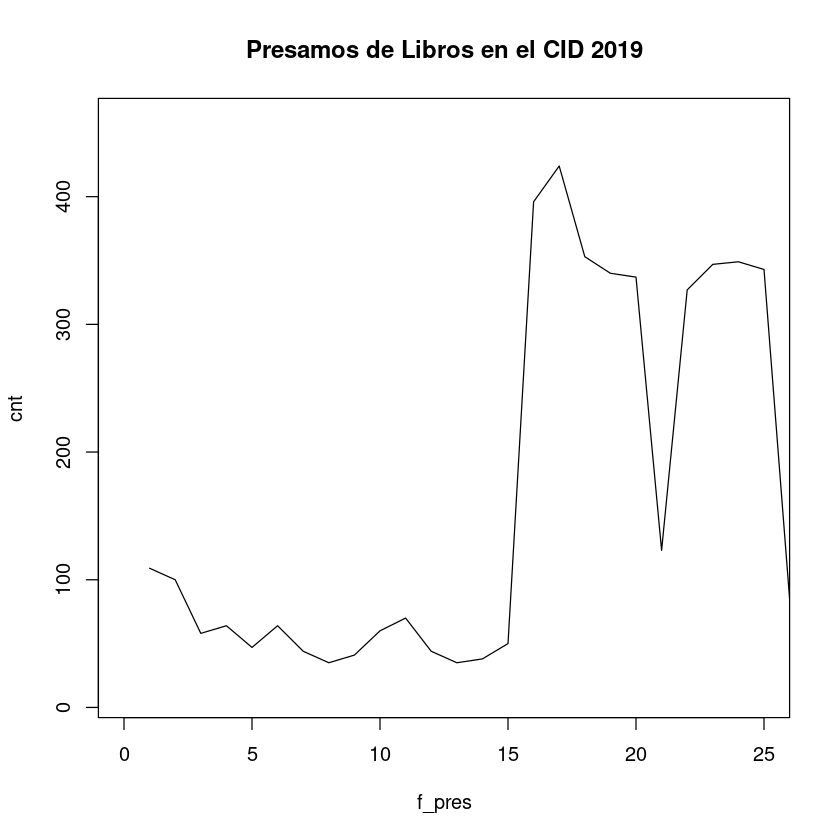

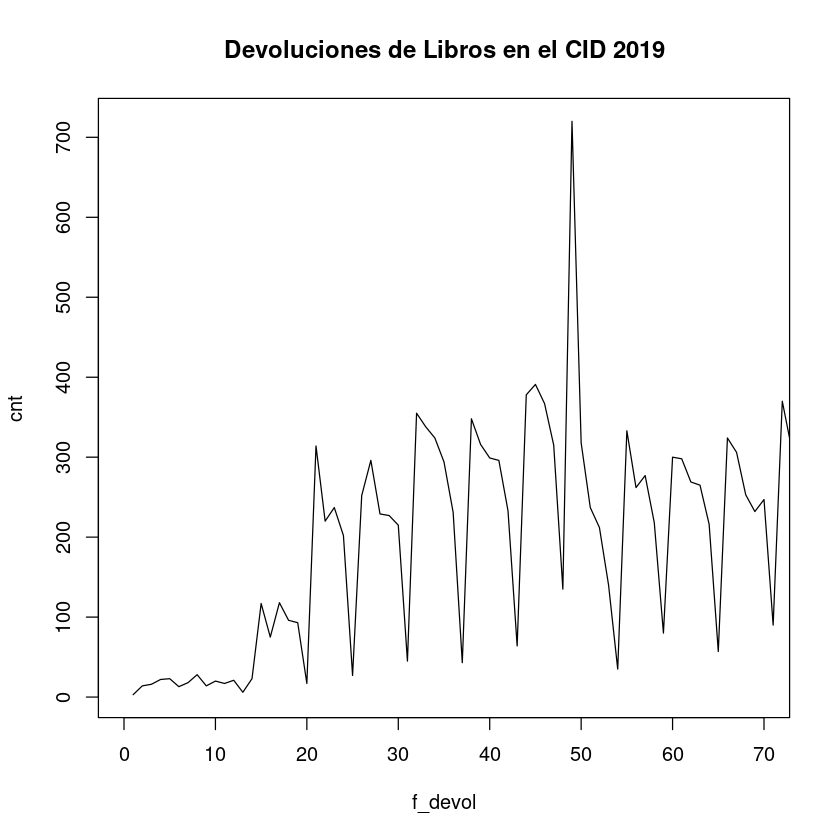

In [25]:
plot(Prestamos_CID,type='l',xlim=c(0,25),main='Presamos de Libros en el CID 2019')
plot(Devoluciones_CID,type='l',xlim=c(0,70),main='Devoluciones de Libros en el CID 2019')

Tanto en las devoluciones, como en los prestamos de los libros se observa que los datos se pueden encerrar en una caja horizontal formada por su varianza, sugiriendo que tiene media y varianza constantes, combirtiendolas en series estacionarias.

### ACFs

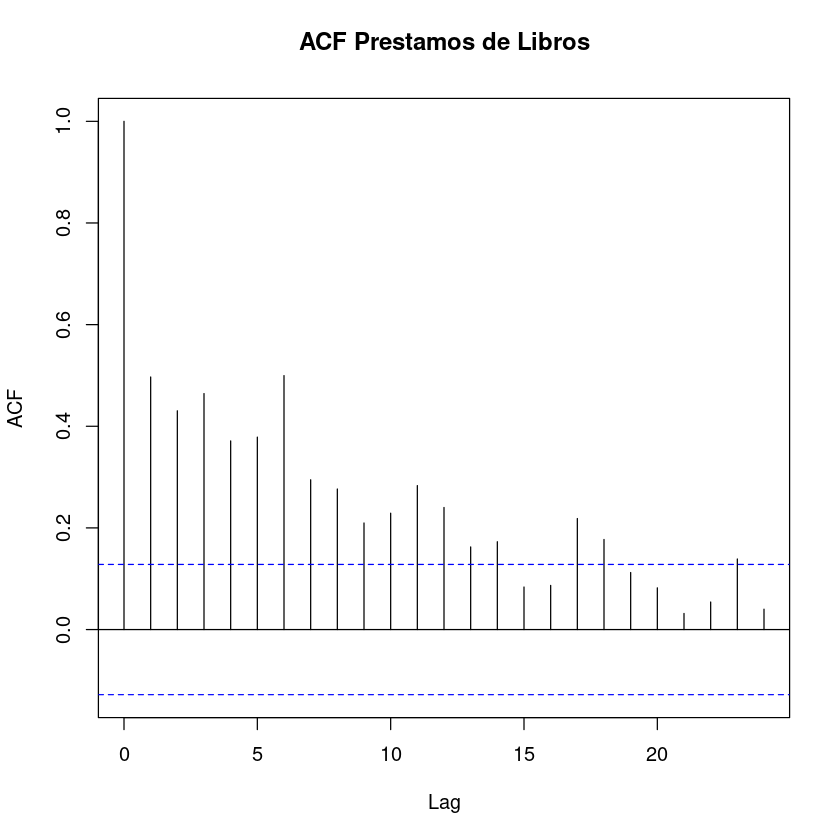

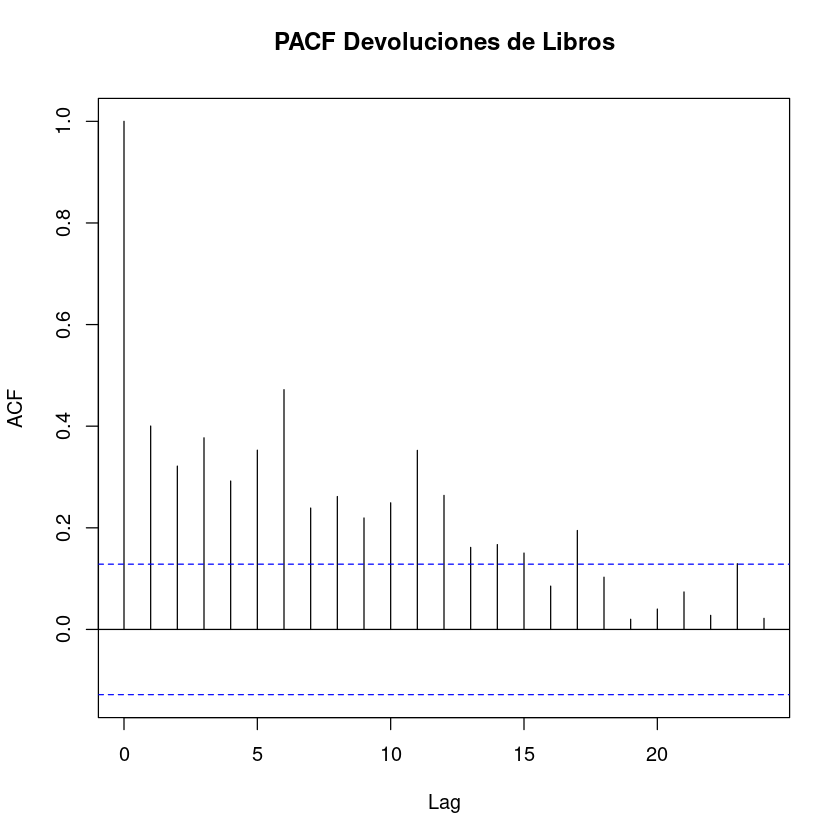

In [23]:
acfobj<-acf(Prestamos_CID$cnt,plot ='true',lag.max=24,main='ACF Prestamos de Libros')
acf(Devoluciones_CID$cnt,plot ='true',lag.max=24,main='PACF Devoluciones de Libros')

### PACFs

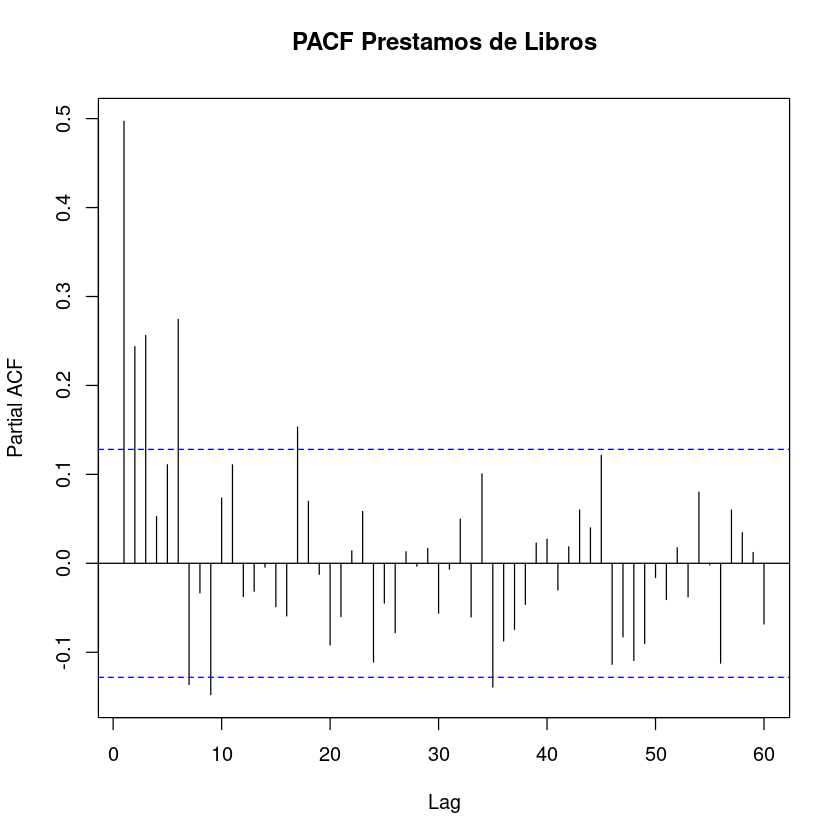

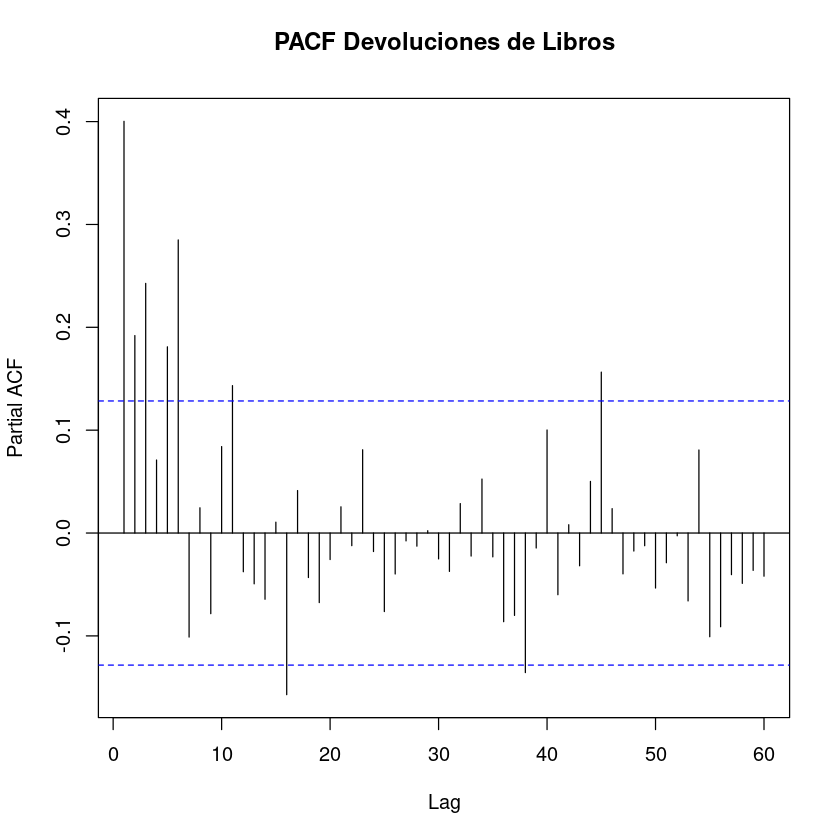

In [22]:
pacf(Prestamos_CID$cnt,plot ='true',lag.max=60,main='PACF Prestamos de Libros')
pacf(Devoluciones_CID$cnt,plot ='true',lag.max=60,main='PACF Devoluciones de Libros')

Como la ACF no decrece rápidamente o se trunca la serie no es estacionaria, sin envargo se puede percibir cierta periodicidad y se muestran diversos datos significativos tanto en la ACF como en la PACF.

### Periodograma

,omega,frecuencia,periodos,densidad
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.02685122,1,234.000000,4961.31952
3,0.05370244,2,117.000000,93464.15917
4,0.08055366,3,78.000000,4334.47143
5,0.10740488,4,58.500000,29545.77407
6,0.13425610,5,46.800000,3840.15598
7,0.16110732,6,39.000000,3766.23789
8,0.18795853,7,33.428571,2679.24363
9,0.21480975,8,29.250000,218.02596
10,0.24166097,9,26.000000,821.25543


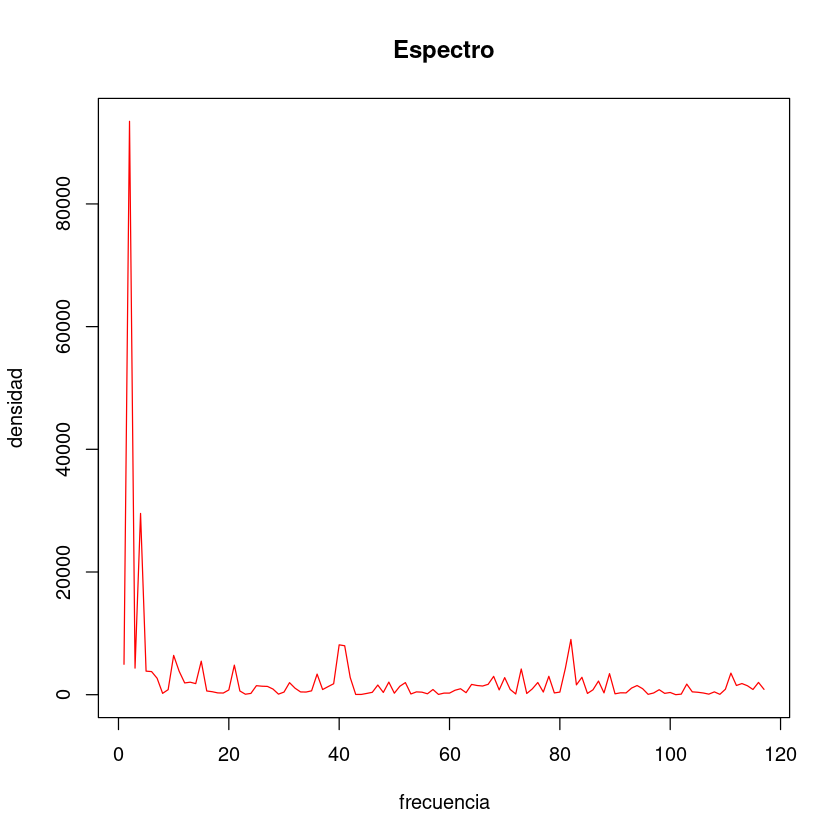

In [18]:
#install.packages("descomponer")
library("descomponer")
gperiodograma(Prestamos_CID$cnt)
df_period_pres<-periodograma(Prestamos_CID$cnt)
head(df_period_pres,n=41)

,omega,frecuencia,periodos,densidad
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.02696646,1,233.000000,1534.33968
3,0.05393292,2,116.500000,100583.97065
4,0.08089938,3,77.666667,3094.44221
5,0.10786584,4,58.250000,37049.24810
6,0.13483230,5,46.600000,6867.62212
7,0.16179876,6,38.833333,2514.37012
8,0.18876522,7,33.285714,1422.83784
9,0.21573168,8,29.125000,2860.66108
10,0.24269814,9,25.888889,2024.10306


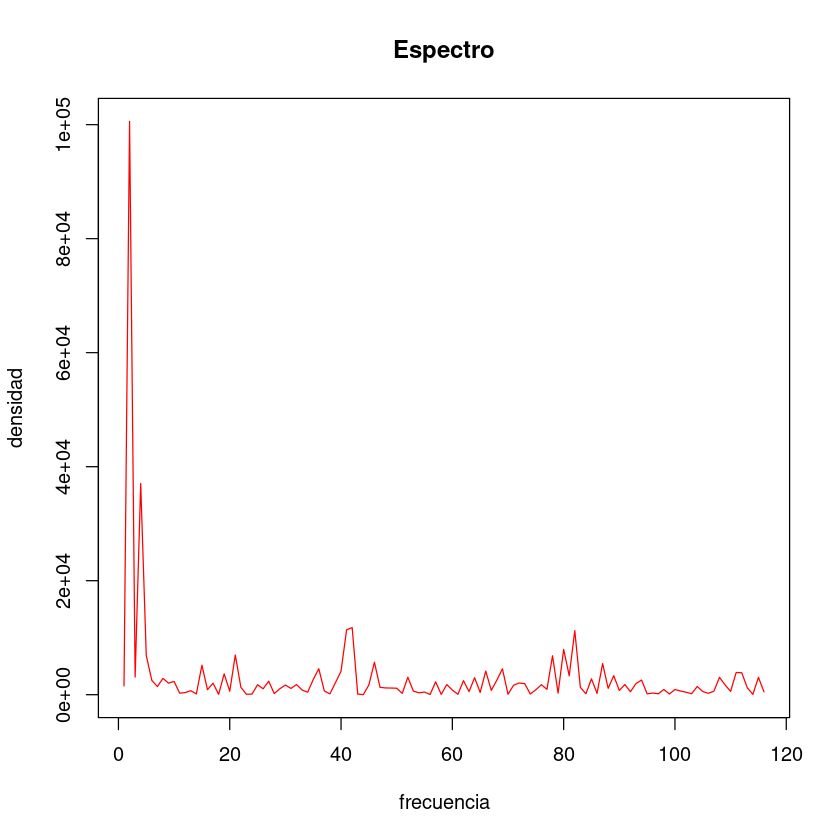

In [19]:
gperiodograma(Devoluciones_CID$cnt)
df_period_dev <- periodograma(Devoluciones_CID$cnt)
head(df_period_dev,n=40)

Tanto para los préstamos como para las devoluciones se observa un periodo de 6, es decir los datos tienden a repetirse cada 6 dias.

### Periodograma Integrado

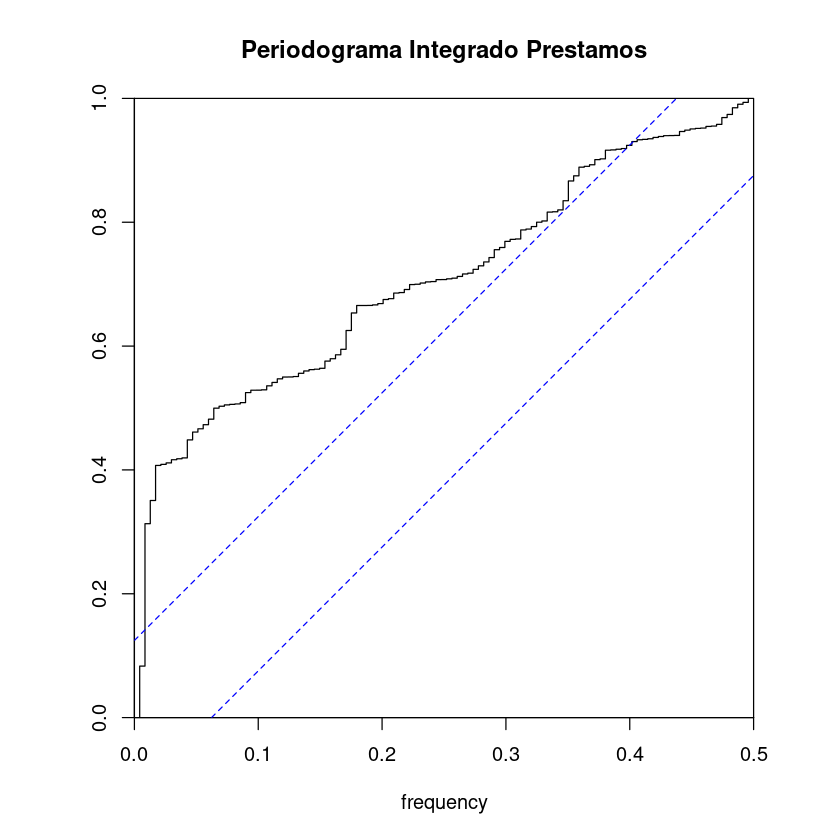

In [20]:
cpgram(Prestamos_CID$cnt,main='Periodograma Integrado Prestamos')

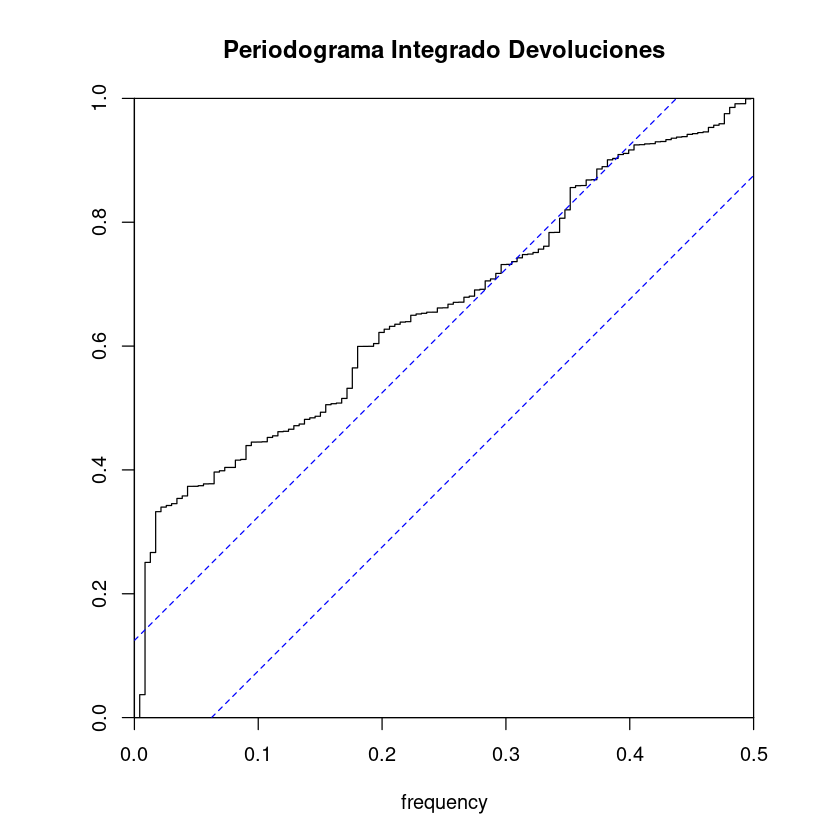

In [21]:
cpgram(Devoluciones_CID$cnt,main='Periodograma Integrado Devoluciones')

Nuevamente en ambos casos de préstamos y devoluciones se observa un compartamiento similar, esta vez sus respectivos periodogramas integrados muestran que los datos se pueden predecir